<a href="https://colab.research.google.com/github/peta-m175/rabbit_challenge/blob/master/deep_learning/day2/vanishing_gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 勾配消失問題

誤差逆伝播法が下位層（後半）に進んでいくに連れて、勾配がどんどん緩やかになっていく。

そのため、勾配降下法による、更新では下位層のパラメータはほとんど変わらず、訓練は最適値に収束しなくなる

### 勾配消失問題のビジョン

シグモイド関数の最大値が0.5のため、勾配を重ねる(掛け合わせる)度、学習率の増加は小さくなる。

## 勾配消失の解決方

### 活性化関数の選択

#### Relu関数

勾配消失問題の回避とスパース化に貢献することで良い成果をもたらす。
$$
f(x)= \begin{cases}
    x~~~(x>0) \\
    0~~~(x\le0)
  \end{cases}
$$
```
def relu(x):
  return np.maximum(0, x)
```

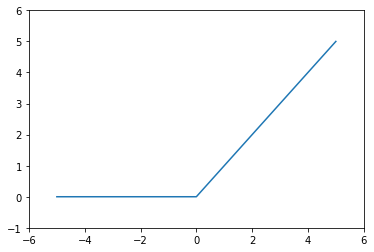

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
  return np.maximum(0, x)

x = np.arange(-5, 6, 1)
y = relu(x)
plt.plot(x,y)
plt.xlim(-6, 6)
plt.ylim(-1, 6)
plt.show()

### 重みの初期値設定

#### Xavier

- 初期値を設定する際の活性化関数
  - Relu関数
  - シグモイド（ロジスティック）関数
  - 双曲線正接関数
- 設定方法
  - 重みの要素を、前の層のノード数の平方根で除算した値
  ```
  # Xavierの初期値
    network['W1'] = np.random.randn(input_layer_size, hidden_layer_1_size) / (np.sqrt(input_layer_size))
    network['W2'] = np.random.randn(hidden_layer_1_size, hidden_layer_2_size) / (np.sqrt(hidden_layer_1_size))
    ```

#### He

- 初期値を設定する際の活性化関数
  - Relu関数
- 設定方法
  - 重みの要素を、前の層のノード数の平方根で除算した値に対し√２をかけ合わせた値
  ```
    # Heの初期値
    network['W1'] = np.random.randn(input_layer_size, hidden_layer_1_size) / np.sqrt(input_layer_size) * np.sqrt(2)
    network['W2'] = np.random.randn(hidden_layer_1_size, hidden_layer_2_size) / np.sqrt(hidden_layer_1_size) * np.sqrt(2)
  ```

### バッチ正規化

- ミニバッチ単位で、入力値のデータの偏りを抑制する手法
- 2015年頃に提唱され、多くの論文で利用される。

使いどころ
- 活性化関数に値を渡す前後に、バッチ正規化の処理を孕んだ層を加える


1. 
$$
\mu_t =\frac{1}{N_t}\sum_{i=1}^{N_t}x_{ni}
$$
2. 
$$
\sigma_t^2= \frac{1}{N_t}\sum_{i=1}^{N_t}(x_{ni}-=mu_t)^2
$$
3. 
$$
\hat{x}_{ni}=\frac{x_{ni}-\mu_t}{\sqrt{\sigma_t^2+\theta}}
$$
4. 
$$
y_{ni}=\gamma x_{ni}+\beta
$$
- $\mu_t$:ミニバッチ$t$全体の平均
- $\sigma_t^2$:ミニバッチ$t$全体の標準偏差
- $N_t$:ミニバッチのインデックス
- $\hat{x}_{ni}$:0に値を近づける計算(0を中心とするセンタリング)と正規化を施した値
- $\gamma$:スケーリングパラメータ
- $\beta$:シフトパラメータ
- $y_{ni}$:ミニバッチのインデックス値とスケーリングの積にシフトを加算した値(バッチ正規化オペレーションの出力)

## 確認テスト

### P.13

- Q: 連鎖律の原理を使い、$\frac{d z}{d x}$を求めよ
$$
z = t^2\\
t = x+y
$$
- A:
$$
\frac{d z}{d x} = 2t \cdot 1 = 2t=2(x+y)\\
\frac{d z}{d x}=\frac{d z}{d t}\frac{d t}{d x}\\
z=t^2 \\
t=x+y\\
\frac{d z}{d t}=2t \\
\frac{d t}{d x}=1
$$


### P.20

- Q: シグモイド関数を微分した時、入力値が0の時に最大値をとる。その値として正しいものを選択肢から選べ。
  1. 0.15
  2. 0.25
  3. 0.35
  4. 0.45
- A: 2

  シグモイド関数の最大値は0.5($x=0$のとき)

  シグモイド関数
  $$
  \varsigma_a(x)=\frac{1}{1+\exp^{-u}}
  $$
  のため、これを微分し導関数がわかる。
  $$
  \varsigma_a'(x)=\frac{a\exp^{-ax}}{(1+\exp^{-ax})}=a\varsigma_a(x)\{1-\varsigma_a(x)\}
  $$
  ここでは標準シグモイド関数の為、$a=1$とする。

  よって
  $$
  \varsigma_1'(x)=(1-0.5)\cdot 0.5 = 0.25
  $$




### P.28

- Q: 重みの初期値に0を設定すると、どのような問題が発生するか。簡潔に説明せよ。
- A: バイアスが変動なく伝わるため、誤差の最小化のために行うパラメータのチューニングができなくなる。

### P.31

- Q: 一般的に考えられるバッチ正規化の効果を2点挙げよ。
- A: 
  1. 大きな学習係数が使える
    - これまでは、学習係数を上げるとパラメータのscaleの問題によって、勾配消失・爆発する。
      
      伝播中パラメータのscaleに影響を受けなくなる。結果的に学習係数を上げることができ、学習の収束速度が向上する。
  2. 正則化効果がある
    - これまでの正則化テクニックを不要にできるという議論がある。
      - L2正則化の必要性が下がる
      - Dropoutの必要性が下がる
        - Dropoutは、過学習を抑える働きがあるが学習速度が遅くなる

## 演習

https://colab.research.google.com/github/peta-m175/rabbit_challenge/blob/master/deep_learning/day2/exercises/2_2_2_vanishing_gradient_modified.ipynb